In [264]:
import pandas as pd
import numpy as np
import seaborn as sns

## I. Explore and clean the data

In [265]:
#Load the dataset
wvs = pd.read_csv("wvs.csv", sep="\t")

In [266]:
#View the data
wvs.sample(6)

,V2,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,MN_228S8,MN_229A,MN_230A,MN_233A,MN_237B1,MN_249A1,MN_249A3,I_RELIGBEL,I_NORM1,I_VOICE1
54926,275,1,2,2,3,1,1,1,2,2,...,-4,-4,-4,-4,-4,-4,-4,0.0,1.0,0.00
55073,275,2,2,3,2,2,1,2,3,2,...,-4,-4,-4,-4,-4,-4,-4,0.0,1.0,0.00
13911,156,1,1,1,4,1,4,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,1.0,1.0,0.00
50155,528,1,1,2,2,2,3,1,2,1,...,-4,-4,-4,-4,-4,-4,-4,1.0,0.0,0.66
16125,218,1,1,1,3,1,2,1,1,2,...,-4,-4,-4,-4,-4,-4,-4,0.0,1.0,0.00
23553,288,1,2,1,2,1,1,2,1,1,...,-4,-4,-4,-4,-4,-4,-4,0.0,0.0,0.66


In [267]:
#Check out the dimensions
wvs.shape

(90350, 328)

### Clean V23 

In [268]:
#Take all cases where there are no missing answers survey wise
wvs_clean = wvs[wvs.V23 > 0]

In [269]:
wvs_clean.shape

(89771, 328)

In [270]:
#Drop all NA's
wvs_clean = wvs_clean[~wvs_clean.V23.isna()]

In [271]:
wvs_clean.shape

(89771, 328)

### Make a plot of different answers

In [272]:
#View the value counts for V23
wvs_clean.V23.value_counts().reset_index(name="Frequency")

,index,Frequency
0,8,18213
1,7,15493
2,10,11928
3,5,11331
4,6,10666
5,9,9264
6,4,4600
7,3,3463
8,1,2828
9,2,1985


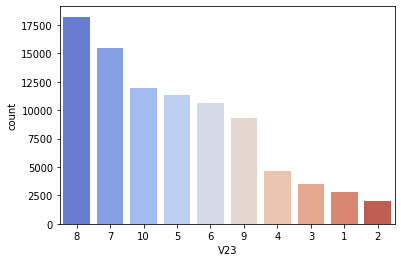

In [273]:
#Plot the frequencies
sns.countplot(x="V23",data=wvs_clean,palette="coolwarm",order = wvs_clean['V23'].value_counts().index)

In [274]:
# create a variable to denote cases where satisfaction rating higher than 6
wvs_clean['satisfied'] = wvs_clean.V23.apply(lambda x: 1 if x>5 else 0)

In [275]:
#View relative frequencies
wvs_clean.satisfied.value_counts(normalize=True) * 100

1    73.034722
0    26.965278
Name: satisfied, dtype: float64

Based on the above response 73% of the respondents are at a satisfaction level greater than 6.

## II. Create the design matrix

### Select more than 100 variables and create outcome variable

In [276]:
# Create subset based on selected 100+ variables
wvs_100 = wvs_clean[['V2', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11','V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V49', 'V55', 'V57', 'V58', 'V59', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V126', 'V145', 'V146', 'V147', 'V148', 'V149', 'V152', 'V170', 'V171', 'V172', 'V173' , 'V174', 'V175', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V188', 'V189', 'V190', 'V191', 'V211', 'V212', 'V213', 'V214', 'V216', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V243', 'V245', 'V246', 'V248', 'V253', 'V255']]

In [277]:
wvs_100.shape

(89771, 108)

In [278]:
#Drop NA's for selected variables
wvs_100.dropna(inplace=True)

/Users/hshetty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [279]:
wvs_100.head()

,V2,V4,V5,V6,V7,V8,V9,V10,V11,V23,...,V237,V238,V239,V240,V243,V245,V246,V248,V253,V255
0,12,1,1,1,-2,1,1,2,1,8,...,1,4,5,1,2,1,1,7.0,1,1
1,12,1,2,3,4,2,2,2,2,5,...,2,3,6,2,2,1,1,7.0,1,1
2,12,1,3,2,4,2,1,2,2,4,...,1,4,6,2,2,1,1,5.0,1,1
3,12,1,1,3,4,3,1,2,1,8,...,4,4,5,2,2,1,1,6.0,1,1
4,12,1,1,1,2,1,1,1,3,8,...,2,3,7,2,2,1,1,3.0,1,1


In [280]:
wvs_100.shape

(89770, 108)

In [281]:
#Remove all cases where we have missing answers
for column in wvs_100.columns:
    wvs_100.drop(wvs_100[wvs_100[column] < 0].index, inplace = True)

/Users/hshetty/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [282]:
# Create outcome variable
Y = wvs_100.V23

In [283]:
wvs_100.head()

,V2,V4,V5,V6,V7,V8,V9,V10,V11,V23,...,V237,V238,V239,V240,V243,V245,V246,V248,V253,V255
4,12,1,1,1,2,1,1,1,3,8,...,2,3,7,2,2,1,1,3.0,1,1
14,12,1,2,3,4,4,1,2,3,4,...,4,5,4,1,2,1,1,3.0,1,1
31,12,1,4,1,4,1,1,2,2,10,...,1,3,4,2,2,1,1,3.0,1,1
55,12,1,1,2,4,2,1,3,2,5,...,4,4,4,1,2,1,1,5.0,1,1
57,12,1,1,1,2,1,1,3,3,1,...,2,4,5,1,2,1,1,9.0,1,1


In [284]:
Y.shape

(13481,)

### Convert categorical variables into dummy variables

The variables that are categorical are - V2, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V57, V147, V148, V149, V179, V180, V230, V234, V235, V236, V237, V240, V243, V245, V246 AND V255

In [285]:
# Create dummy variables
cat_cols = ['V2', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V57', 'V147', 'V148', 'V149', 'V179', 'V180', 'V230', 'V234', 'V235', 'V236', 'V237', 'V240', 'V243', 'V245', 'V246' , 'V255']

wvs_100 = pd.get_dummies(data=wvs_100, columns=cat_cols, drop_first=True)

## III. Condition Numbers

In [286]:
# print iterative condition number of design matrix
wvs_100_mod = pd.DataFrame()
ctr = 0
print('Condition numbers')

for column in wvs_100.columns:
    wvs_100_mod[column] = wvs_100[column]
    ctr += 1
    print(column,',' ,ctr, 'columns, k=',np.linalg.cond(wvs_100_mod))

Condition numbers
V4 , 1 columns, k= 1.0
V5 , 2 columns, k= 4.817556146145612
V6 , 3 columns, k= 6.83268891471901
V7 , 4 columns, k= 9.653095272764018
V8 , 5 columns, k= 11.074676190580623
V9 , 6 columns, k= 12.0670254781654
V10 , 7 columns, k= 13.409629892752902
V11 , 8 columns, k= 14.606965351142664
V23 , 9 columns, k= 25.747766739215397
V49 , 10 columns, k= 26.3604367037649
V55 , 11 columns, k= 34.58902431845327
V58 , 12 columns, k= 35.04952350813847
V59 , 13 columns, k= 39.6059568541214
V70 , 14 columns, k= 40.335625081605166
V71 , 15 columns, k= 41.81030621839575
V72 , 16 columns, k= 42.547009637399164
V73 , 17 columns, k= 43.57424836488091
V74 , 18 columns, k= 44.12376785198366
V75 , 19 columns, k= 44.870241205173684
V76 , 20 columns, k= 46.06763641761684
V77 , 21 columns, k= 46.679824316824444
V78 , 22 columns, k= 47.301415883607504
V79 , 23 columns, k= 47.91650871050504
V102 , 24 columns, k= 49.908537251919874
V103 , 25 columns, k= 50.472447682625365
V104 , 26 columns, k= 50.96

## IV. Do some social science

### Perform OLS 

In [287]:
import statsmodels.formula.api as smf

# fit using OLS and view results
model = smf.ols(formula='V23 ~ V11 + V59 + V55', data=wvs_100_mod).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    V23   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     1911.
Date:                Sun, 08 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:47:10   Log-Likelihood:                -28269.
No. Observations:               13481   AIC:                         5.655e+04
Df Residuals:                   13477   BIC:                         5.658e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4447      0.082     42.139      0.0

The above table shows that the R-squared and the adjusted R-squared are 0.298. This means that the 3 features that we have chose (V11, V55 and V59), explain 29.8% of the variability in the response variable.

It is surprising to see that out of the 100+ variables that we have chosen for the model, these 3 features alone account for 30% of the variability. But the low R and adjusted R score also imply that we need to include more variables in the model. 

### Compute RMSE

In [288]:
# predict using OLS
predictions = model.predict()

In [289]:
from statsmodels.tools.eval_measures import rmse

# Calculate RMSE for OLS
model_rmse = rmse(Y,predictions)
print(model_rmse)

1.9699084109736726


## V. Back to ML: Model

Now it is time to use all these variables to model satisfaction. Use sklearn.linear_model.LinearRegression
here as this is easy to be switched with ridge and lasso, and it takes in the design matrix directly.
1. compute the condition number for your design matrix (just a single number, not the stepwise procedure).
2. Split the data into training-validation chunks (80-20 or so)
3. compute the condition number for your training design matrix (just a single number, not the stepwise procedure).
4. Fit a linear regression model where you describe satisfaction with the design matrix X you just created.
5. predict and compute RMSE on training data
6. predict and compute RMSE on testing data
7. repeat the previous with Ridge regression, play a little with different α-s. Which α gave you the best testing RMSE? (No need for a rigorous analysis, just play a little)
8. and repeat with Lasso regression again playing a little with different α-s.
9. comment your results:
    - compare RMSE on testing/training data. What does this suggest in terms of overfitting?
    - compare RMSE for OLS, Ridge and Lasso
    - compare the resulting RMSE with the small benchmark model you did above

If your results are like mine, you see that a) RMSE on both testing-training sets are similar; b) RMSE for
OLS, Ridge, Lasso are similar; and c) all these 100 or so extra variables add very little explanatory power
to the model.

In [290]:
Y.sample(5)

55785     9
57066    10
24348     8
63988     5
51391     7
Name: V23, dtype: int64

In [291]:
# drop outcome variable from input data
wvs_100_mod.drop('V23', axis=1, inplace=True)

### Compute condition numbers

In [292]:
#Compute condition number on input data
np.linalg.cond(wvs_100_mod)

1879.240738159632

In [294]:
from sklearn.model_selection import train_test_split

# Assign input data to X
X = wvs_100_mod

#split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("Condition Number of training design matrix = ",np.linalg.cond(X_train))

Condition Number of training design matrix =  1918.269764952689


### Perform Linear Regression

In [297]:
from sklearn.linear_model import LinearRegression

# Fit using linear regression
linreg = LinearRegression().fit(X_train, Y_train)
train_predict = linreg.predict(X_train)

# Calculate RMSE for Linear Reg on train
train_rmse = rmse(Y_train, train_predict)
print("RMSE train score = ", train_rmse)

# Calculate RMSE for Linear Reg on test
test_predict = linreg.predict(X_test)
test_rmse = rmse(Y_test, test_predict)
print("RMSE test score = ", test_rmse)

RMSE train score =  1.785951303257111
RMSE test score =  1.829548814563285


### Run ridge regression with different alphas

In [300]:
from sklearn.linear_model import Ridge

# Create list of different alpha values for ridge
alpha_val = [0.2, 3, 10]

for val in alpha_val:
    # Fit using ridge and different alphas
    linreg_ridge = Ridge(alpha=val).fit(X_train, Y_train)
    train_ridge_pred = linreg_ridge.predict(X_train)
    
    # Calculate RMSE for Ridge Reg on train
    train_ridge_rmse = rmse(Y_train, train_ridge_pred)
    print("For alpha=",val)
    print("RMSE on train = ", train_ridge_rmse)
    
    # Calculate RMSE for Ridge Reg on test
    test_ridge_pred = linreg_ridge.predict(X_test)
    test_ridge_rmse = rmse(Y_test, test_ridge_pred)
    print("RMSE on test = ", test_ridge_rmse)
    print()

For alpha= 0.2
RMSE on train =  1.7859966291553586
RMSE on test =  1.8292440290201442

For alpha= 3
RMSE on train =  1.7871075899118918
RMSE on test =  1.829036371150448

For alpha= 10
RMSE on train =  1.7878836295644993
RMSE on test =  1.8288092575226558



### Run lasso regression with different alphas

In [302]:
from sklearn.linear_model import Lasso

# Create list of different alpha values for lasso
lasso_val = [0.1, 0.5, 2]

for val in lasso_val:
    # Fit using lasso
    linreg_lasso = Lasso(alpha=val).fit(X_train, Y_train)
    train_lasso_pred = linreg_lasso.predict(X_train)
    
    # Calculate RMSE for Lasso Reg on train
    train_lasso_rmse = rmse(Y_train, train_lasso_pred)
    print("For alpha=",val)
    print("RMSE on train = ", train_lasso_rmse)
    
    # Calculate RMSE for Lasso Reg on test
    test_lasso_pred = linreg_lasso.predict(X_test)
    test_lasso_rmse = rmse(Y_test, test_lasso_pred)
    print("RMSE on test = ", test_lasso_rmse)
    print()

For alpha= 0.1
RMSE on train =  1.8720962819611648
RMSE on test =  1.8652410474344552

For alpha= 0.5
RMSE on train =  2.0020169608077634
RMSE on test =  2.0011045662998774

For alpha= 2
RMSE on train =  2.2152040401824227
RMSE on test =  2.1978455637437664



1. Compare RMSE on testing/training data. What does this suggest in terms of overfitting?
    - The RMSE for the train and testing data in Linear Regression is different which is expected since test error is usually greater than training error. This suggests that the model is slightly overfitting the data. 

    
2. Compare RMSE for OLS, Ridge and Lasso
    - OLS RMSE: 1.9699084109736726
    - Ridge: Train RMSE is more or less 1.79 whereas Test RMSE is 1.83
    - Lasso: Train RMSE for smaller values of alpha is around 1.87 and for higher values is around 2.2. Test RMSE for smaller alpha values is 1.87 whereas for higher values is around 1.86. This could either be because the model generalizes well to the data or it could be because the test set has statistically different properties as compared to training.    
    - Based on the above, I would say that the results from ridge were the best followed by OLS and then lasso.


3. Compare the resulting RMSE with the small benchmark model you did above
    - The benchmarked RMSE was 1.96, which is higher than ridge but lower than the higher alpha values for lasso. This shows that ridge performs the best amongst the three methods. Given that there is not much difference between the benchmarked RMSE and the other methods implies that adding the other 100+ variables, did not improve the model performance much.

## VI. Overfitting the data

As WVS is a relatively large dataset we cannot easily overfit by adding more variables. But we can go
another easy route instead: we take a subsample.
1. Create a subsample of your design matrix and the outcome variable. Choose a large-ish sample that overfits. The size depends on which variables do you exactly choose, in my case 2000 obs rarely overfits (it depends on the train-validation split), 1000 typically overfits.
2. repeat the steps you did above.
3. comment how do OLS, Ridge, Lasso perform on testing/training in case of overfitting.
4. comment the condition number of design matrix and overfitting.

In [317]:
#Take a sample of 1000
X_sample = wvs_100_mod.sample(n=1000)

#Store index values
sample_index = list(X_sample.index)
X_sample.head()

,V4,V5,V6,V7,V8,V9,V10,V11,V49,V55,...,V235_2,V236_2,V237_2,V237_3,V237_4,V240_2,V243_2,V245_2,V246_2,V255_2
42032,1,1,3,3,1,1,1,1,1,8,...,0,0,1,0,0,0,1,0,0,0
57350,1,2,4,4,1,1,1,1,1,10,...,0,0,1,0,0,0,1,0,0,0
63862,1,1,2,2,1,1,2,3,2,7,...,0,0,0,0,0,0,1,0,0,0
24008,1,1,1,4,1,1,3,2,1,6,...,1,1,0,0,0,1,1,0,0,0
46495,1,2,1,3,1,3,2,2,2,6,...,1,1,1,0,0,0,1,0,0,0


In [318]:
# choose Y values corresponding to sampled X 
Y_sample = Y[sample_index]
Y_sample.head()

42032     7
57350    10
63862     7
24008     7
46495     7
Name: V23, dtype: int64

In [320]:
#split the data into train and test
X_sample_train, X_sample_test, Y_sample_train, Y_sample_test = train_test_split(X_sample, Y_sample, test_size=0.2)

### Linear Regression on sample

In [321]:
# Fit using linear
linreg = LinearRegression().fit(X_sample_train, Y_sample_train)
train_predict = linreg.predict(X_sample_train)

# Calculate RMSE for linear Reg on train
train_rmse = rmse(Y_sample_train, train_predict)
print("RMSE train score = ", train_rmse)

# Calculate RMSE for linear Reg on test
test_predict = linreg.predict(X_sample_test)
test_rmse = rmse(Y_sample_test, test_predict)
print("RMSE test score = ", test_rmse)

RMSE train score =  1.519975815691337
RMSE test score =  2.125223279287573


### Ridge Regression on sample

In [322]:
# Create list of different alpha values for ridge
alpha_val = [0.2, 3, 10]

for val in alpha_val:
    #fit using ridge
    linreg_ridge = Ridge(alpha=val).fit(X_sample_train, Y_sample_train)
    train_ridge_pred = linreg_ridge.predict(X_sample_train)
    
    # Calculate RMSE for ridge Reg on train
    train_ridge_rmse = rmse(Y_sample_train, train_ridge_pred)
    print("For alpha=",val)
    print("RMSE on train = ", train_ridge_rmse)
    
    # Calculate RMSE for ridge Reg on test
    test_ridge_pred = linreg_ridge.predict(X_sample_test)
    test_ridge_rmse = rmse(Y_sample_test, test_ridge_pred)
    print("RMSE on test = ", test_ridge_rmse)
    print()

For alpha= 0.2
RMSE on train =  1.5203294250739923
RMSE on test =  2.1227895574082485

For alpha= 3
RMSE on train =  1.5280228259253053
RMSE on test =  2.08669166466636

For alpha= 10
RMSE on train =  1.5422927224977836
RMSE on test =  2.0590266452203574



### Lasso Regression on sample

In [323]:
# Create list of different alpha values for lasso
lasso_val = [0.1, 0.5, 2]

for val in lasso_val:
    # Fit using lasso
    linreg_lasso = Lasso(alpha=val).fit(X_sample_train, Y_sample_train)
    train_lasso_pred = linreg_lasso.predict(X_sample_train)
    
    # Calculate RMSE for lasso Reg on train
    train_lasso_rmse = rmse(Y_sample_train, train_lasso_pred)
    print("For alpha=",val)
    print("RMSE on train = ", train_lasso_rmse)
    
    # Calculate RMSE for lasso Reg on test
    test_lasso_pred = linreg_lasso.predict(X_sample_test)
    test_lasso_rmse = rmse(Y_sample_test, test_lasso_pred)
    print("RMSE on test = ", test_lasso_rmse)
    print()

For alpha= 0.1
RMSE on train =  1.752144934016974
RMSE on test =  2.046303703436911

For alpha= 0.5
RMSE on train =  1.900195308184129
RMSE on test =  2.1622796910597226

For alpha= 2
RMSE on train =  2.133262073126023
RMSE on test =  2.2886987972529296



Observations on RMSE values after we overfit the model - In all three cases the test RMSE is higher than the train RMSE which is what we expected i.e the model will overfit the training set.

In [324]:
# display condition numbers
print("Sample design matrix condition number", np.linalg.cond(X_sample))
print("Sample train set condition number", np.linalg.cond(X_sample_train))

Sample design matrix condition number 1797.3717702833685
Sample train set condition number 1941.247032065037


The condition number of the sample training set is much higher than the condition numbers of all the other design matrixes so far.